<a href="https://colab.research.google.com/github/versatiledp/volatilityexperiments/blob/main/Portfolio_volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Downloading Data**
To estimate the volatility (standard deviation), we’ll need to download some data for the stocks in our portfolio. We’ll use the techniques described in an earlier tutorial to download three months of daily data from the entire SNP500.

In [ ]:
import pandas as pd
wikipedia_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
snp_company_list = wikipedia_data[0] # the first table
import yfinance as yf
# get the list of ticker symbols
snp_ticker_symbols = snp_company_list.Symbol.tolist()

# download some data from yahoo
data = yf.download(
        tickers = snp_ticker_symbols,
        period = '3mo',
        interval = '1d'
    )
prices = data['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [ ]:
print(snp_ticker_symbols)
#print(snp_company_list)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'C

In [ ]:
import numpy as np
returns = prices.pct_change()
# first we choose the parameters of the Dirichlet distribution
alphas = .05*np.ones(returns.shape[1])
# sample 100 random portfolios
portfolio = np.random.dirichlet(alphas, size=1)

Text(0, 0.5, 'Return')

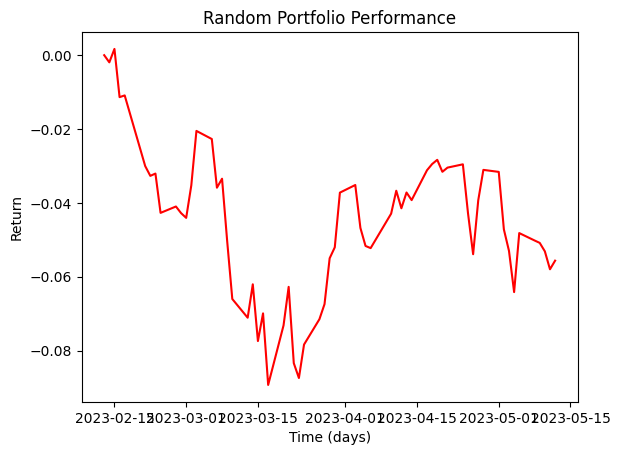

In [ ]:
import matplotlib.pyplot as plt
plt.plot(returns.fillna(0).dot(portfolio.T).add(1).cumprod().sub(1), color='r')
plt.title('Random Portfolio Performance')
plt.xlabel('Time (days)')
plt.ylabel('Return')

In [ ]:
covariance = np.cov(returns.fillna(0).T)

In [ ]:
portfolio_volatility = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T))

In [ ]:
aapl_volatility = np.std(returns['AAPL'].dropna())

In [ ]:
print(portfolio_volatility)
print(aapl_volatility)

[[0.00986879]]
0.013645067718365132


In [ ]:
returns = prices.pct_change()

We now have 6 months of price data from all the companies in the SNP500, and have computed the daily returns for all of them. Let’s see what it looks like if we just plot the whole kit and kaboodle at once:

Text(0, 0.5, 'cumulative returns')

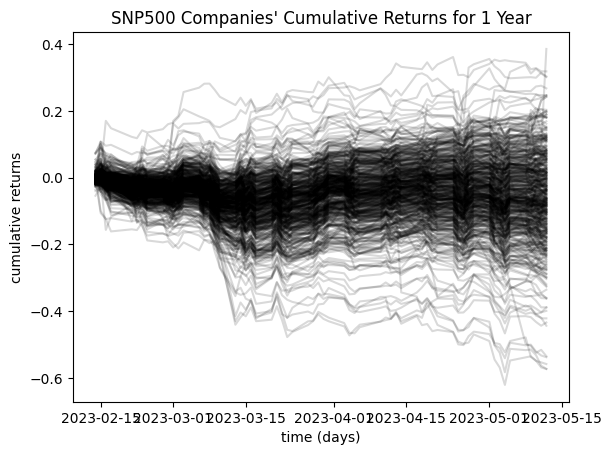

In [ ]:
plt.figure()
plt.plot(returns.add(1).cumprod().sub(1), alpha=.15, color='k')
plt.title("SNP500 Companies' Cumulative Returns for 1 Year")
plt.xlabel('time (days)')
plt.ylabel('cumulative returns')

By visual inspection, it looks like the SNP500 has ever-so-slightly increased over the last year, on average. Some individual stocks, on the other hand, have done horrible (losing 25% of their value), while others have done great (gaining 60% of their initial value).

Depending on the stocks we chose to invest in over the year, there’s a wide variety potential outcomes.

**Computing Portfolios**
A portfolio is a particular allocation of your investment funds across a selection of stocks. To compute a stock k‘s weight in your portfolio, you just multiply the total value of your investment in that stock, Vk, by the total value of your portfolio, V. The resulting number is that stocks’ weight, and we’ll call it wk,

wk=VkV

Let’s say say that we weight each stock in the SNP500 equally. To see how this portfolio would have done over time (to simulate the portfolio), we just need to multiply each stocks’ return by its weight, and then add them all up. This is easy to do for this simple portfolio.

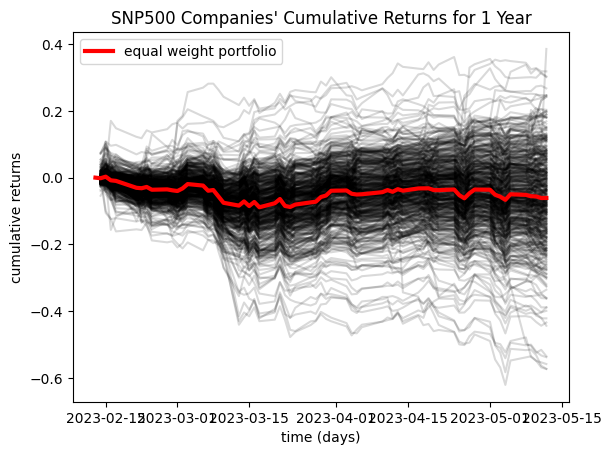

In [ ]:
num_stocks = prices.shape[1]
weights = 1/num_stocks * np.ones(num_stocks)
equal_weight_portfolio = returns.multiply(weights).sum(axis=1)
plt.figure()
plt.plot(returns.add(1).cumprod().sub(1), alpha=.15, color='k')
plt.plot(equal_weight_portfolio.add(1).cumprod().sub(1), 'r', label='equal weight portfolio', linewidth=3)
plt.title("SNP500 Companies' Cumulative Returns for 1 Year")
plt.xlabel('time (days)')
plt.ylabel('cumulative returns')
plt.legend()

The red line above is the performance of our equally-weighted portfolio. We can already see that this portfolio looks like it goes up ever-so-slightly. It’s nowhere near as wild as any of the individual SNP500 stocks — it’s free of both the wild up and downswings.

This already goes a long way toward making our point about diversity — but we can go a little further. Let’s look at a collection of different portfolios, and see how they perform.

**Sampling Random Portfolios**
To study diversification across many different portfolios, we’ll just draw them at random from the Dirichlet distribution. The Dirichlet distribution is a probability distribution over discrete probability distributions. If that doesn’t make sense to you, don’t worry. The point is that we can use the Dirichlet distribution to choose a collection of random portfolios, and see how each of them would have performed.

To use the Dirichlet distribution, we just need to choose its α parameters.

Text(0.5, 1.0, 'All Random Portfolios')

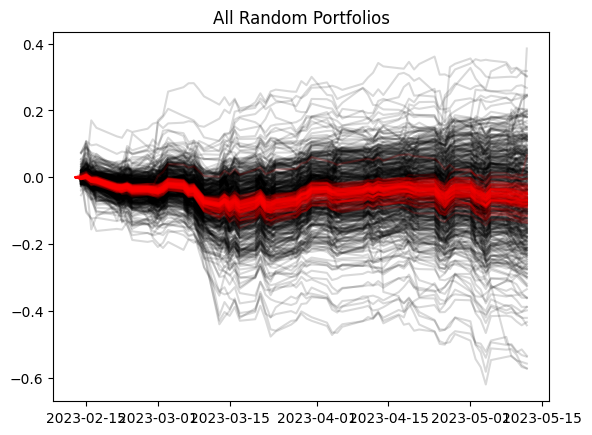

In [ ]:
alphas = .05*np.ones(returns.shape[1])
# sample 100 random portfolios
portfolios = np.random.dirichlet(alphas, size=100)
plt.figure()
plt.plot(returns.add(1).cumprod().sub(1), alpha=.15, color='k')
plt.plot(returns.fillna(0).dot(portfolios.T).add(1).cumprod().sub(1), alpha=.15, color='r')
plt.title('All Random Portfolios')

Once again, investing in many stocks at once massively reduces the variability of our investments. Now, though, we see that that there was nothing special about our “equally weighted” portfolio. Investing in enough stocks — even randomly — reduces the variability of our investment.

We can look at the converse, too. When the Dirichlet distribution’s α parameter becomes very small, it produces portfolios with fewer stocks in them. Let’s reduce the alpha parameter and see how it affects our randomly-generated portfolios.



Text(0.5, 1.0, 'All Random Portfolios')

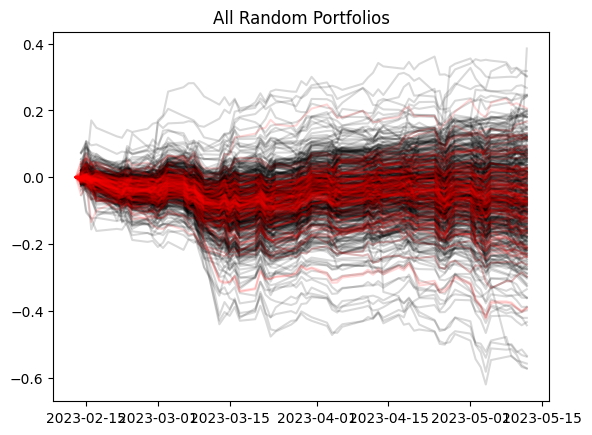

In [ ]:
alphas = .001*np.ones(returns.shape[1])
# let's draw 100 portfolios
portfolios = np.random.dirichlet(alphas, size=100)
plt.figure()
plt.plot(returns.add(1).cumprod().sub(1), alpha=.15, color='k')
plt.plot(returns.fillna(0).dot(portfolios.T).add(1).cumprod().sub(1), alpha=.15, color='r')
plt.title('All Random Portfolios')